# Phase 3 - Deployment considerations and next steps
- Detailed information in previous notebooks with one quick resume below

### Resume
- 23 machine learning models were built to identify the best one for deployment
- The GBM model deployed achieved 88,05% of metric recall, and is much higher than the first GBM model (increase 71%)
- Focus on recall metric is really important because an action plan could be triggered to more customers that likely to churn and will provide higher customer base of possible churners to interact with focus on customer retention

## Top 3 main important features related to churn (Yes) are:
- Month-to-Month contract
- Small to Medium Tenure and associated with
- Higher Monthly Charges

#### Using the right technique it is possible to build machine learning models that really help in business, so move on to the deployment options


# Deployment options

The deployment of the solution could be done in many ways, such as

- Apply the model to a new customer base, identify possible churners and start one marketing campaign to suggest other contract options for the customer


- Integrate the machine learning model with the CRM and Call Center systems for a better interaction with the customer when the next call of these possible churners occurs. 


- 3rd option could be an application to provide small discounts for specific services and integrated with billing systems to try to maintain customer loyalty


- And of course, setup one major project to implement all actions above and so on...

### The process improvement to tackle here is basically decrease the numbers of customers churn
The chart below shows 2 main important information to follow
- Decrease the orange area (revenue associated with customer churners) and 
- Increase the blue area (revenue related to current customers)

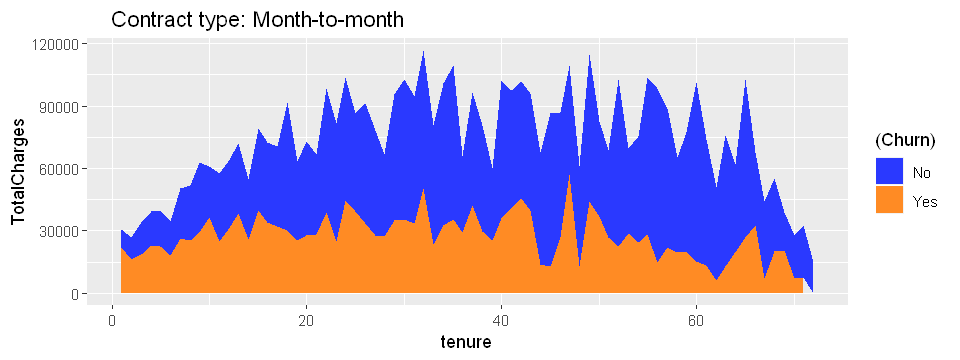

In [2]:
library(tidyverse)
df <- data.table::fread('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df <- as_tibble(df)

options(repr.plot.width = 8, repr.plot.height = 3)
## Exclude Customer_ID and apply 0 to Total Charges -> First Bill
df[is.na(df$TotalCharges) & df$tenure==0 , ]['TotalCharges'] <- 0
# df$customerID <- NULL

color_manual <- c('#2a39ff', '#ff8b24')

df %>% filter(Contract=='Month-to-month') %>%   
  group_by(Churn, tenure, Contract) %>% 
  summarise( MonthlyCharges=sum(MonthlyCharges), 
             TotalCharges=sum(TotalCharges))  %>% 
  qplot(data=. ,x=tenure, y=TotalCharges, 
        geom='area', fill=(Churn),
        main='    Contract type: Month-to-month') + scale_fill_manual(values=color_manual)


## Technical information - Batch process vs Online prediction
- The final solution could be executed as a batch process - already presented
- Another alternative can be the execution of online predictions. Concepts explained below:
<br> &emsp; With few adjustments in the python script provided, the prediction can be executed using Micro services architecture
<br> &emsp; &emsp; Example 1: AWS cloud provider: Use of Server less architecture such as AWS Lambda + API Gateway to run the predictions
<br> &emsp; &emsp; Example 2: On-Premise solution integrated with Docker
<br> &emsp; This slim docker image https://hub.docker.com/r/brincom/py_jdk8_uwsgi already have python/flask and uswsgi installed to run this type of solution


# Summary and final comments

- These 3 phases could be deployed in just one big document
- For better understanding all steps involved in the project were split with one notebook related to specific task
- Common data science projects follow this pipeline